<a href="https://colab.research.google.com/github/nitver90/Machine-Learning-Repo/blob/main/Tabular%20Playground%20Series%20March%202021/New_Tabular_Playground_Series_Mar_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,precision_score,recall_score,roc_curve,roc_auc_score,accuracy_score,plot_roc_curve

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
ds_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")
ds_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/test.csv")

In [4]:
pd.set_option("display.max_columns",None)

In [5]:
ds_train.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
0,0,A,I,A,B,B,BI,A,S,Q,A,LO,A,A,A,A,B,D,D,B,0.629858,0.855349,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,0
1,1,A,I,A,A,E,BI,K,W,AD,F,HJ,A,B,A,B,D,B,D,B,0.370727,0.328929,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729,0
2,2,A,K,A,A,E,BI,A,E,BM,L,DJ,A,B,A,A,B,D,D,B,0.502272,0.322749,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452,0
3,3,A,K,A,C,E,BI,A,Y,AD,F,KV,A,A,A,A,B,D,D,B,0.934242,0.707663,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242,0
4,4,A,I,G,B,E,BI,C,G,Q,A,DP,A,A,A,B,B,B,D,B,0.254427,0.274514,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


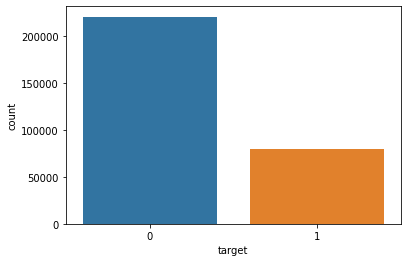

In [6]:
sb.countplot(ds_train.target)
plt.show()

In [7]:
ds_train.shape

(300000, 32)

In [8]:
ds_test.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10
0,5,A,F,A,A,F,BI,A,AH,AX,A,LF,A,A,A,A,B,D,D,B,0.708120,0.735690,0.578366,0.723154,0.228037,0.356227,0.551249,0.655693,0.598331,0.359987,0.947489
1,6,A,H,C,A,E,AB,I,F,N,A,MC,A,A,A,B,D,B,D,B,0.611637,0.313703,0.928885,0.516602,0.600169,0.795224,0.248987,0.654614,0.347944,0.565520,0.388580
2,8,A,N,C,A,F,AB,A,AH,BC,A,FN,A,A,A,B,B,D,D,B,0.456289,0.448201,0.424876,0.344729,0.242073,0.270632,0.746740,0.335590,0.341238,0.252289,0.411592
3,9,B,L,C,A,F,BI,A,E,AX,A,HK,A,A,A,A,B,D,B,B,0.338692,0.666092,0.598943,0.561971,0.806347,0.735983,0.538724,0.381566,0.481660,0.348514,0.325723
4,11,A,F,A,B,F,BI,A,AH,I,A,HX,A,A,A,A,D,D,D,B,0.631671,0.772229,0.479572,0.767745,0.252454,0.354810,0.178920,0.763479,0.562491,0.466261,0.585781


In [9]:
ds_test.shape

(200000, 31)

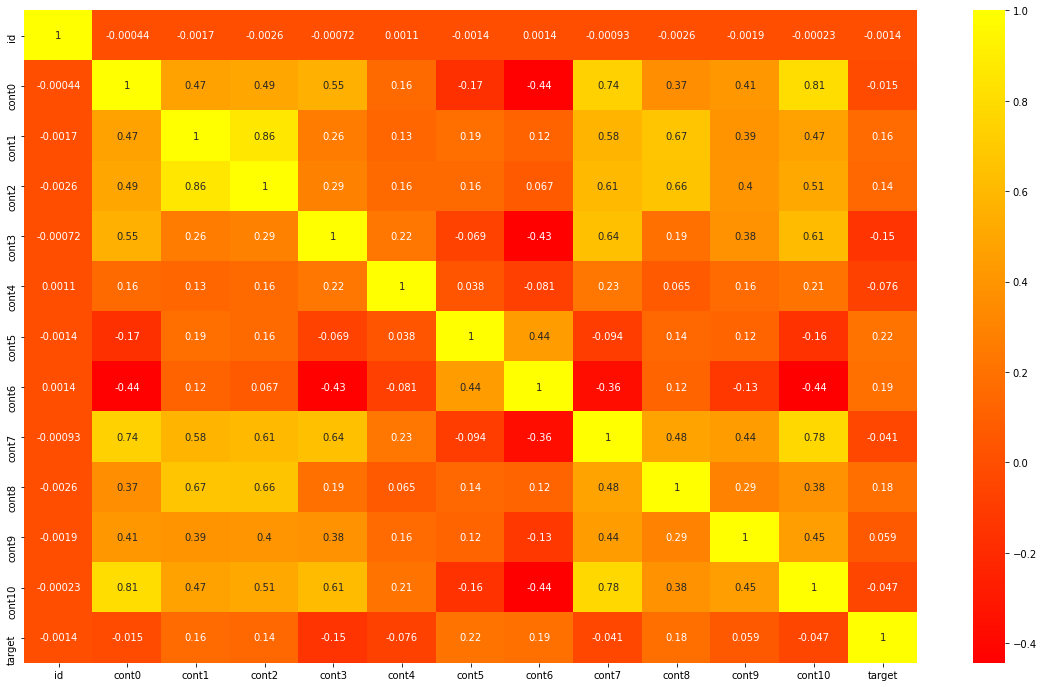

In [10]:
plt.figure(figsize=(20,12))
heatmap = sb.heatmap(ds_train.corr(), annot=True, cmap="autumn")
plt.show()

In [11]:
ds_train.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
0,0,A,I,A,B,B,BI,A,S,Q,A,LO,A,A,A,A,B,D,D,B,0.629858,0.855349,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,0
1,1,A,I,A,A,E,BI,K,W,AD,F,HJ,A,B,A,B,D,B,D,B,0.370727,0.328929,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729,0
2,2,A,K,A,A,E,BI,A,E,BM,L,DJ,A,B,A,A,B,D,D,B,0.502272,0.322749,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452,0
3,3,A,K,A,C,E,BI,A,Y,AD,F,KV,A,A,A,A,B,D,D,B,0.934242,0.707663,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242,0
4,4,A,I,G,B,E,BI,C,G,Q,A,DP,A,A,A,B,B,B,D,B,0.254427,0.274514,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960,1


In [12]:
ds_train.shape

(300000, 32)

In [13]:
def value_count (dataset):    
    for col in dataset.iloc[:,1:19]:
        print(col)
        value_count = dataset[col].value_counts().sort_index()
        print(value_count)
        print("Unique Values Number : " ,len(dataset[col].value_counts().sort_index()))
        print()

In [14]:
value_count(ds_train)

cat0
A    223525
B     76475
Name: cat0, dtype: int64
Unique Values Number :  2

cat1
A    10547
B     6847
C     1703
D      414
E      235
F    43818
G    11248
H    17257
I    90809
J    10036
K    41870
L    31891
M    11354
N    13231
O     8740
Name: cat1, dtype: int64
Unique Values Number :  15

cat2
A    168694
B       218
C     38875
D     22720
E       110
F      9877
G     18225
H       219
I      5287
J      9102
K       126
L      3997
M      8068
N       340
O      2749
Q     10901
R       129
S       197
U       166
Name: cat2, dtype: int64
Unique Values Number :  19

cat3
A    187251
B     79951
C     15957
D      8676
E      3318
F      2489
G       372
H       274
I       177
J       286
K       846
L       292
N       111
Name: cat3, dtype: int64
Unique Values Number :  13

cat4
A        92
B       301
C       506
D     27919
E    129385
F     76678
G     30754
H     23388
I      3241
J      4307
K      1481
L       214
M       547
N        81
O       330
P       100

In [15]:
value_count(ds_test)

cat0
A    149023
B     50977
Name: cat0, dtype: int64
Unique Values Number :  2

cat1
A     7256
B     4522
C     1164
D      310
E      140
F    29123
G     7497
H    11547
I    60152
J     6657
K    28221
L    21207
M     7709
N     8717
O     5778
Name: cat1, dtype: int64
Unique Values Number :  15

cat2
A    112465
B       161
C     25683
D     15113
E        77
F      6538
G     12284
H       139
I      3630
J      6107
K        79
L      2702
M      5461
N       248
O      1799
Q      7195
R        78
S       124
U       117
Name: cat2, dtype: int64
Unique Values Number :  19

cat3
A    124506
B     53476
C     10600
D      5918
E      2130
F      1687
G       251
H       199
I       146
J       197
K       609
L       203
N        78
Name: cat3, dtype: int64
Unique Values Number :  13

cat4
A       50
B      183
C      348
D    18882
E    86073
F    51016
G    20496
H    15621
I     2075
J     2974
K      987
L      130
M      409
N       60
O      240
P       68
Q       57
R   

In [16]:
from sklearn.preprocessing import LabelEncoder
for col in ds_train.iloc[:,1:20]:
    le = LabelEncoder()
    ds_train[col] = le.fit_transform(ds_train[col])

In [17]:
ds_train

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
0,0,0,8,0,1,1,33,0,44,54,0,258,0,0,0,0,1,3,3,1,0.629858,0.855349,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,0
1,1,0,8,0,0,4,33,8,48,3,5,162,0,1,0,1,3,1,3,1,0.370727,0.328929,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729,0
2,2,0,10,0,0,4,33,0,30,38,9,69,0,1,0,0,1,3,3,1,0.502272,0.322749,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452,0
3,3,0,10,0,2,4,33,0,50,3,5,241,0,0,0,0,1,3,3,1,0.934242,0.707663,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242,0
4,4,0,8,6,1,4,33,2,32,54,0,75,0,0,0,1,1,1,3,1,0.254427,0.274514,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,499993,0,13,5,0,4,45,0,19,48,0,159,0,0,0,1,3,1,3,1,0.681700,0.500730,0.662428,0.671927,0.390566,0.145840,0.262767,0.514248,0.519340,0.617436,0.688007,0
299996,499995,0,10,0,0,6,33,0,36,4,4,163,0,1,0,1,1,3,3,1,0.489226,0.790664,0.821657,0.620356,0.384891,0.735879,0.547731,0.726653,0.470575,0.275743,0.638939,0
299997,499996,0,6,12,0,7,33,2,37,43,0,156,1,0,0,1,3,1,3,3,0.487882,0.522347,0.407037,0.232436,0.832482,0.810663,0.596939,0.308821,0.373997,0.518024,0.452144,1
299998,499997,1,7,0,3,1,33,0,1,23,0,25,0,0,0,0,1,0,3,0,0.331900,0.812891,0.808045,0.630708,0.346898,0.735147,0.563488,0.609836,0.680430,0.318453,0.335822,0


In [18]:
for col in ds_test.iloc[:,1:20]:
    le = LabelEncoder()
    ds_test[col] = le.fit_transform(ds_test[col])

In [19]:
value_count(ds_train)

cat0
0    223525
1     76475
Name: cat0, dtype: int64
Unique Values Number :  2

cat1
0     10547
1      6847
2      1703
3       414
4       235
5     43818
6     11248
7     17257
8     90809
9     10036
10    41870
11    31891
12    11354
13    13231
14     8740
Name: cat1, dtype: int64
Unique Values Number :  15

cat2
0     168694
1        218
2      38875
3      22720
4        110
5       9877
6      18225
7        219
8       5287
9       9102
10       126
11      3997
12      8068
13       340
14      2749
15     10901
16       129
17       197
18       166
Name: cat2, dtype: int64
Unique Values Number :  19

cat3
0     187251
1      79951
2      15957
3       8676
4       3318
5       2489
6        372
7        274
8        177
9        286
10       846
11       292
12       111
Name: cat3, dtype: int64
Unique Values Number :  13

cat4
0         92
1        301
2        506
3      27919
4     129385
5      76678
6      30754
7      23388
8       3241
9       4307
10      1481
1

In [20]:
value_count(ds_test)

cat0
0    149023
1     50977
Name: cat0, dtype: int64
Unique Values Number :  2

cat1
0      7256
1      4522
2      1164
3       310
4       140
5     29123
6      7497
7     11547
8     60152
9      6657
10    28221
11    21207
12     7709
13     8717
14     5778
Name: cat1, dtype: int64
Unique Values Number :  15

cat2
0     112465
1        161
2      25683
3      15113
4         77
5       6538
6      12284
7        139
8       3630
9       6107
10        79
11      2702
12      5461
13       248
14      1799
15      7195
16        78
17       124
18       117
Name: cat2, dtype: int64
Unique Values Number :  19

cat3
0     124506
1      53476
2      10600
3       5918
4       2130
5       1687
6        251
7        199
8        146
9        197
10       609
11       203
12        78
Name: cat3, dtype: int64
Unique Values Number :  13

cat4
0        50
1       183
2       348
3     18882
4     86073
5     51016
6     20496
7     15621
8      2075
9      2974
10      987
11      130


In [21]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
state = np.random.RandomState(42)
X = ds_train.iloc[:,:-1]
Y = ds_train["target"]
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_resample(X,Y)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

In [ ]:
# X = ds_train.iloc[:,:-1]
# Y = ds_train["target"]
# from imblearn.over_sampling import RandomOverSampler
# os =  RandomOverSampler(sampling_strategy='minority')
# X_train_res, y_train_res = os.fit_resample(X, Y)
# X_train_res.shape,y_train_res.shape



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


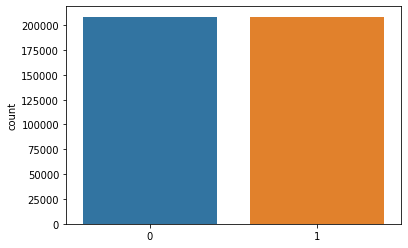

In [22]:
sb.countplot(y_res)
plt.show()

In [23]:
X_test = ds_test.iloc[:,:].values

In [24]:
X_train, X_valid, y_train, y_valid = train_test_split(X_res,y_res,random_state=0)

In [25]:
type(X_res)

numpy.ndarray

In [26]:
sc = StandardScaler()

In [27]:
X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)
X_test = sc.transform(X_test)

### X G Boost

In [28]:
XGB = XGBClassifier()

In [29]:
model_XGB = XGB.fit(X_train,y_train)

In [30]:
print(model_XGB.score(X_train,y_train))
print(model_XGB.score(X_valid,y_valid))

0.8911930846421641
0.8927314401895062


In [31]:
y_train_predict = model_XGB.predict(X_train)
y_valid_predict = model_XGB.predict(X_valid)

In [32]:
fpr, tpr, thresholds = roc_curve(y_valid,y_valid_predict)

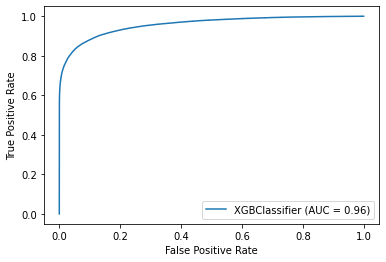

In [33]:
plot_roc_curve(XGB,X_valid,y_valid)

In [34]:
confusion_matrix(y_train,y_train_predict)

array([[144011,  12256],
       [ 21780, 134764]])

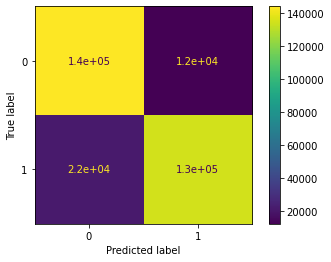

In [35]:
plot_confusion_matrix(XGB,X_train,y_train)
plt.show()

In [36]:
precision_score(y_train,y_train_predict)

0.9166371922187457

In [37]:
recall_score(y_train,y_train_predict)

0.8608697874080131

In [38]:
confusion_matrix(y_valid,y_valid_predict)

array([[48212,  4062],
       [ 7123, 44874]])

In [39]:
y_test_predict = model_XGB.predict(X_test)

In [40]:
y_test_probability = model_XGB.predict_proba(X_test)

In [41]:
y_test_probability

array([[0.9102628 , 0.08973715],
       [0.2846368 , 0.7153632 ],
       [0.89703894, 0.10296106],
       ...,
       [0.18664646, 0.81335354],
       [0.8354256 , 0.16457435],
       [0.7027881 , 0.29721192]], dtype=float32)

In [42]:
roc_auc_score(y_valid, model_XGB.predict_proba(X_valid)[:, 1])

0.9571904874119715

### Calculating best Hyper parameter for X G Boost using Randimized Search

In [ ]:
# parameters = {
#                "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
#                "max_depth"        : [3, 4, 5, 6, 8, 10, 12, 15],
#                "min_child_weight" : [1, 3, 5, 7],
#                "gamma"            : [0.0, 0.1, 0.2 , 0.3, 0.4],
#                "colsample_bytree" : [0.3, 0.4, 0.5 , 0.7] 
#               }

In [ ]:
# random_s_cv = RandomizedSearchCV(estimator = XGB, param_distributions = parameters,
#                                  n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3) 

In [ ]:
# random_s_cv.fit(X_train, y_train)

In [ ]:
# random_s_cv.best_score_

In [ ]:
#random_s_cv.best_estimator_

In [ ]:
#random_s_cv.best_params_

### X G Boost with best Hyper parameters

In [43]:
XGB_best = XGBClassifier(colsample_bytree=0.3,gamma=0.2,learning_rate=0.1,max_depth=8,min_child_weight=3)

In [44]:
model_XGB_best = XGB_best.fit(X_train,y_train)

In [45]:
print(model_XGB_best.score(X_train,y_train))
print(model_XGB_best.score(X_valid,y_valid))

0.9059240244109062
0.9006531058491815


In [46]:
y_train_predict = model_XGB_best.predict(X_train)
y_valid_predict = model_XGB_best.predict(X_valid)

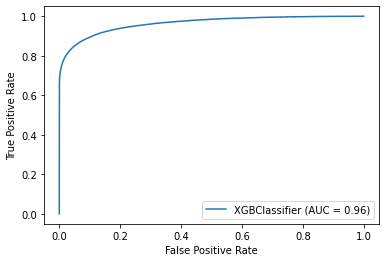

In [47]:
fpr, tpr, thresholds = roc_curve(y_valid,y_valid_predict)
plot_roc_curve(XGB_best,X_valid,y_valid)

In [48]:
roc_auc_score(y_train, model_XGB_best.predict_proba(X_train)[:, 1])

0.9678190297237442

In [49]:
roc_auc_score(y_valid, model_XGB_best.predict_proba(X_valid)[:, 1])

0.9630889440677918

In [50]:
prob = model_XGB_best.predict_proba(X_test)

In [51]:
prob[:,-1]

array([0.15755829, 0.56373763, 0.05221556, ..., 0.79010373, 0.1055167 ,
       0.3896406 ], dtype=float32)

In [52]:
output = pd.DataFrame(ds_test["id"])

In [53]:
output["target"]= prob[:,-1]

In [54]:
output

,id,target
0,5,0.157558
1,6,0.563738
2,8,0.052216
3,9,0.184266
4,11,0.152335
...,...,...
199995,499983,0.868078
199996,499984,0.047461
199997,499987,0.790104
199998,499994,0.105517


In [55]:
output.to_csv("Target_prob.csv")